# Examen 3 - Estimación Óptima
--- 
**Aissa**

**Mariana Salome**

**Monica Ibarra Herrera**

**Rafael Takata García 750625**

### Instrucciones:

Realice un modelo de clasificación de regresión logística considerando la base de datos “train_data.csv”

    a. Calcule las métricas precision, recall, F1-Score y matriz de confusión de su modelo.
    b. Explique cuáles fueron los hiperparámetros seleccionados para este modelo.
    c. Si se tuviera que elegir sólo 2 variables para predecir el nivel de severidad, ¿Cuáles serían?
    d. Realice un scatterplot de esas 2 variables y considerando los coeficientes de ese modelo con 2 variables, grafique la línea frontera que tendría.

#### Librerías a utilizar:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

### Creación del dataframe y analísis inicial:

In [16]:
df = pd.read_csv("data/train_data.csv")
df.head()

,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes,Pred
0,50,Male,272,68,188,82,124,Non-smoker,No,High
1,29,Female,275,68,183,84,129,Non-smoker,No,High
2,50,Male,268,55,189,111,119,Non-smoker,No,High
3,78,Female,194,50,120,94,113,Non-smoker,No,High
4,63,Male,229,35,182,214,160,Smoker,Yes,High


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       119 non-null    int64 
 1   Sex       119 non-null    object
 2   TCh       119 non-null    int64 
 3   HCh       119 non-null    int64 
 4   LCh       119 non-null    int64 
 5   Tr        119 non-null    int64 
 6   BPS       119 non-null    int64 
 7   Sm        119 non-null    object
 8   Diabetes  119 non-null    object
 9   Pred      119 non-null    object
dtypes: int64(6), object(4)
memory usage: 9.4+ KB


Debemos de convertir las variables categóricas a númericas:

In [13]:
df[['Sex', 'Sm', 'Diabetes', 'Pred']].value_counts()

Sex     Sm          Diabetes  Pred  
Female  Non-smoker  No        Medium    26
Male    Non-smoker  No        Low       21
Female  Non-smoker  No        Low       17
Male    Non-smoker  No        High      14
                              Medium    14
Female  Non-smoker  No        High       8
Male    Smoker      No        High       6
Female  Smoker      No        High       4
        Non-smoker  Yes       High       3
Male    Non-smoker  Yes       High       2
Female  Smoker      No        Medium     1
Male    Non-smoker  Yes       Low        1
        Smoker      No        Low        1
                    Yes       High       1
Name: count, dtype: int64

In [17]:
df['Sex'] = df['Sex'].map({'Female':0, 'Male':1})
df['Sm'] = df['Sm'].map({'Smoker':1, 'Non-smoker':0})
df['Diabetes'] = df['Diabetes'].map({'No':0, 'Yes':1})
df['Pred'] = df['Pred'].map({'Low':1, 'Medium':2, 'High':3})

Veamos como se distribuye:

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'TCh'}>],
       [<Axes: title={'center': 'HCh'}>, <Axes: title={'center': 'LCh'}>,
        <Axes: title={'center': 'Tr'}>],
       [<Axes: title={'center': 'BPS'}>, <Axes: title={'center': 'Sm'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Pred'}>, <Axes: >, <Axes: >]],
      dtype=object)

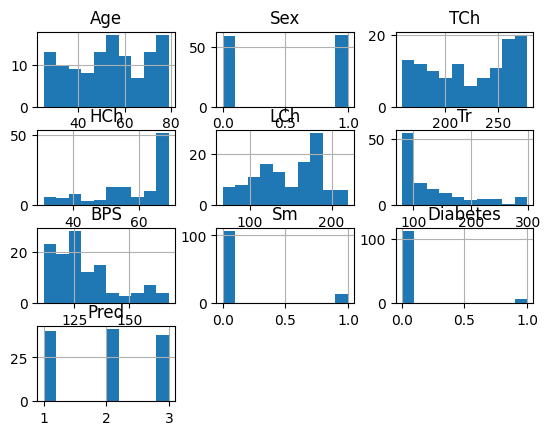

In [21]:
df.hist()

Analisis de correlaciones:

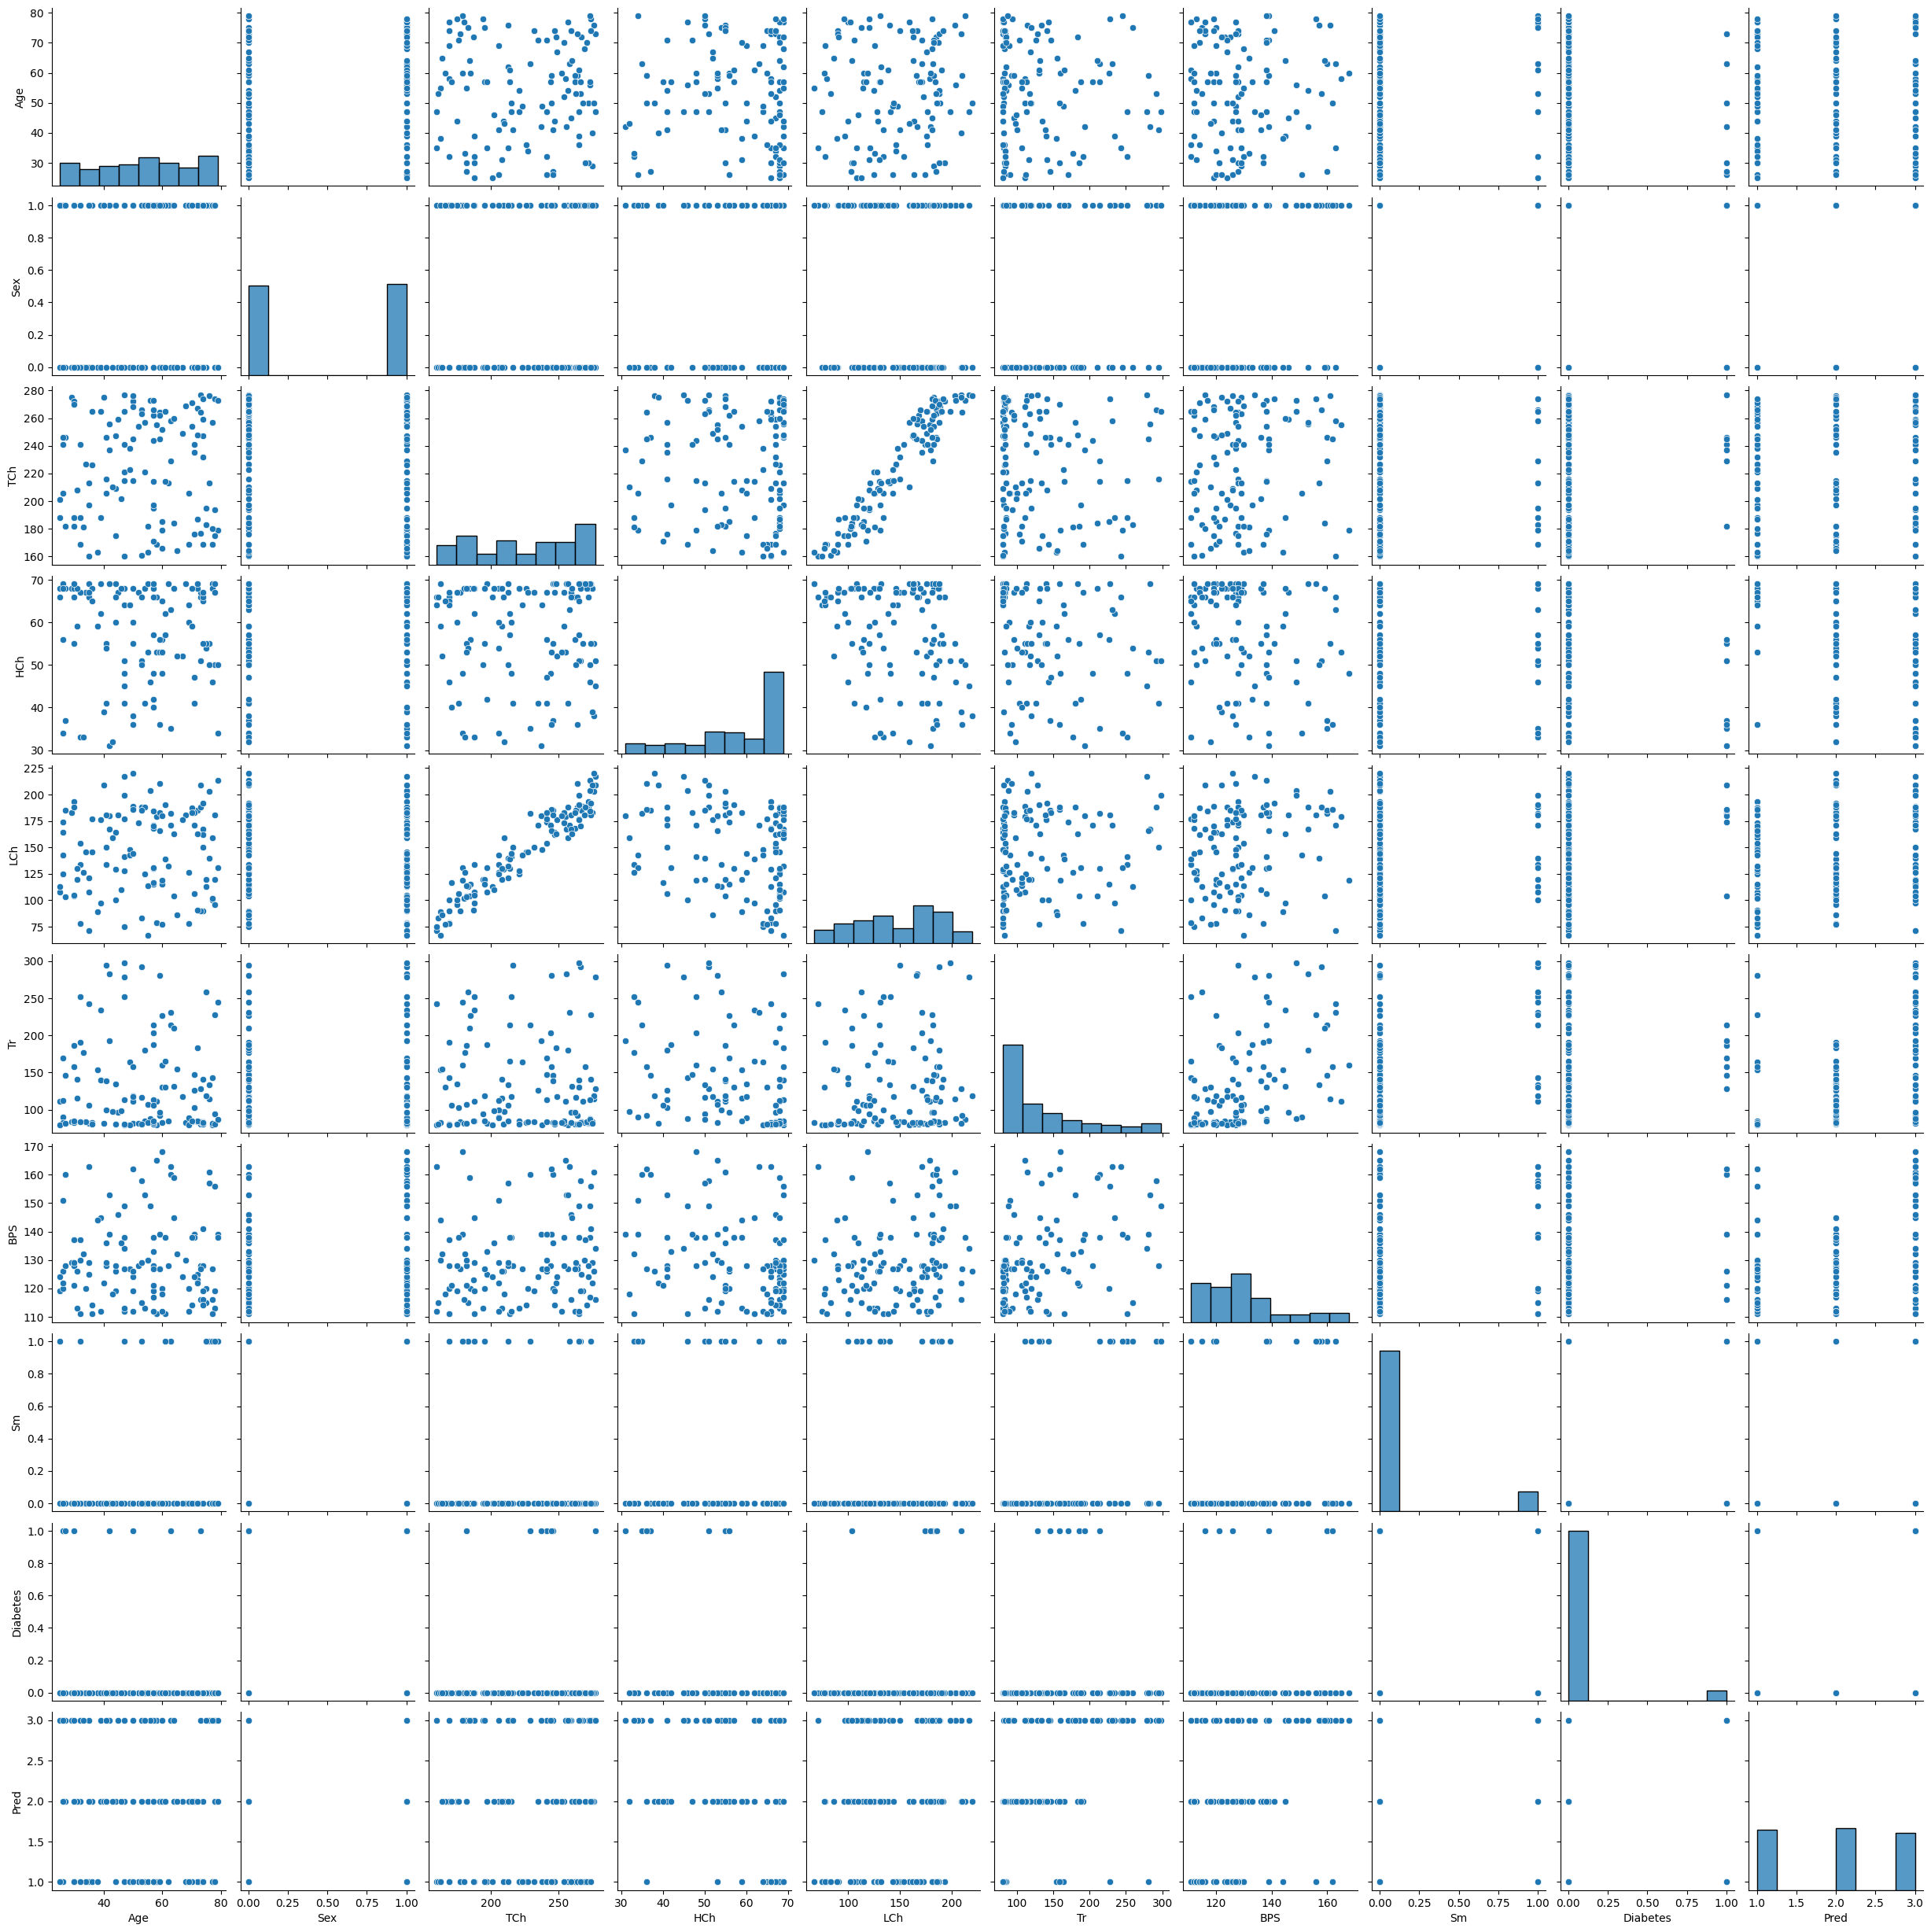

In [23]:
sns.pairplot(df)

<Axes: >

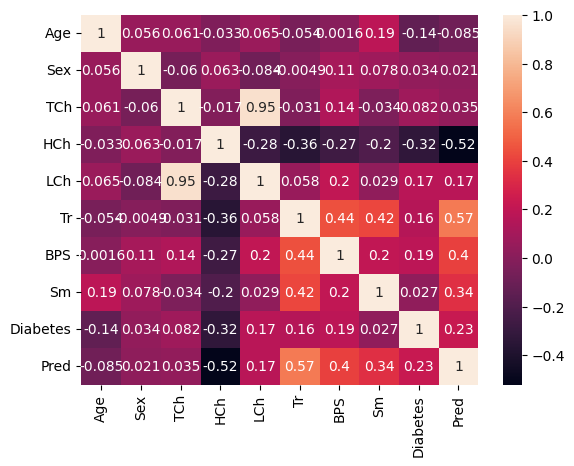

In [20]:
sns.heatmap(df.corr(), annot=True)